In [1]:
import sqlite3

# get data from db - must be local. first scp from pi
connection = sqlite3.connect(r"C:\Users\willm\Documents\RStudioProjects\DemPollingData.db")
cursor = connection.cursor()
cursor.execute("SELECT * from tweets")

rows = cursor.fetchall()

In [2]:
import pandas as pd
import re

# create the formatted dataset
candidates = list()
tweets = list()
usernames = list()
followers = list()
dates = list()
locations = list()

# populate by iterating over all rows of db
# fields of row: text, username, follower count, date, location
for row in rows:
    # there may be more than one candidate mentioned in a given tweet; we consider each mention a different data point
    if "bill de blasio" in row[0].lower():
        candidates.append("Bill de Blasio")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "steve bullock" in row[0].lower():
        candidates.append("Steve Bullock")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "michael bennet" in row[0].lower():
        candidates.append("Michael Bennet")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "joe biden" in row[0].lower():
        candidates.append("Joe Biden")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "pete buttigieg" in row[0].lower():
        candidates.append("Pete Buttigieg")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "tim ryan" in row[0].lower():
        candidates.append("Tim Ryan")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "beto o\'rourke" in row[0].lower():
        candidates.append("Beto O\'Rourke")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "bernie sanders" in row[0].lower():
        candidates.append("Bernie Sanders")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "amy klobuchar" in row[0].lower():
        candidates.append("Amy Klobuchar")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "elizabeth warren" in row[0].lower():
        candidates.append("Elizabeth Warren")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "cory booker" in row[0].lower():
        candidates.append("Cory Booker")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "kamala harris" in row[0].lower():
        candidates.append("Kamala Harris")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "julian castro" in row[0].lower():
        candidates.append("Julian Castro")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "tulsi gabbard" in row[0].lower():
        candidates.append("Tulsi Gabbard")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "john delaney" in row[0].lower():
        candidates.append("John Delaney")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "wayne messam" in row[0].lower():
        candidates.append("Wayne Messam")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "marianne williamson" in row[0].lower():
        candidates.append("Marianne Williamson")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])
    if "andrew yang" in row[0].lower():
        candidates.append("Andrew Yang")
        tweets.append(row[0])
        usernames.append(row[1])
        followers.append(row[2])
        dates.append(row[3])
        locations.append(row[4])

# clean tweets (kind of)
pattern = re.compile('([^\s\w]|_)+') # for better performance
for i in range(len(tweets)):
    tweet = tweets[i]
    tweets[i] = pattern.sub('', tweet[2:])

# create df
data_dict = {"candidate": candidates, "text": tweets, "username": usernames, "followers": followers, "date": dates, "location": locations}
tweet_data_df = pd.DataFrame(data_dict)

tweet_data_df.head()

,candidate,text,username,followers,date,location
0,Bernie Sanders,Whenever I watch the democratic debates I wait...,babycailie,149,Fri Sep 13 01:55:33 +0000 2019,work
1,Bernie Sanders,Bernie Sanders looks tired DemDebate,7810o,346,Fri Sep 13 01:55:33 +0000 2019,"Southern California, USA"
2,Joe Biden,In all seriousness is Joe Biden ok,Nate_Denny,1260,Fri Sep 13 01:55:33 +0000 2019,"Plano, TX"
3,Andrew Yang,Andrew Yang just said Puerto Rico is a country...,TheMahdiMonster,893,Fri Sep 13 01:55:34 +0000 2019,None
4,Joe Biden,Age isnxe2x80x99t Joe Bidenxe2x80x98s problem ...,AnandWrites,515767,Fri Sep 13 01:55:34 +0000 2019,"Brooklyn, New York"


In [3]:
# add basic sentiment analysis
from textblob import TextBlob

sentiments = list()
polarities = list()

for item in tweet_data_df['text'].tolist():
    tweetBlob = TextBlob(item)
    polarities.append(tweetBlob.sentiment[0])
    sentiments.append(tweetBlob.sentiment[1])

tweet_data_df['subjectivity'] = sentiments
tweet_data_df['polarity'] = polarities

tweet_data_df.head()

,candidate,text,username,followers,date,location,subjectivity,polarity
0,Bernie Sanders,Whenever I watch the democratic debates I wait...,babycailie,149,Fri Sep 13 01:55:33 +0000 2019,work,0.2,0.1
1,Bernie Sanders,Bernie Sanders looks tired DemDebate,7810o,346,Fri Sep 13 01:55:33 +0000 2019,"Southern California, USA",0.7,-0.4
2,Joe Biden,In all seriousness is Joe Biden ok,Nate_Denny,1260,Fri Sep 13 01:55:33 +0000 2019,"Plano, TX",0.5,0.5
3,Andrew Yang,Andrew Yang just said Puerto Rico is a country...,TheMahdiMonster,893,Fri Sep 13 01:55:34 +0000 2019,None,0.0,0.0
4,Joe Biden,Age isnxe2x80x99t Joe Bidenxe2x80x98s problem ...,AnandWrites,515767,Fri Sep 13 01:55:34 +0000 2019,"Brooklyn, New York",0.0,0.0


In [4]:
# fix dates

import pandas as pd

tweet_data_df['datetime'] = pd.to_datetime(tweet_data_df['date'])

tweet_data_df['day'] = tweet_data_df['datetime'].dt.strftime('%#m/%#d/%y')

tweet_data_df.head()

,candidate,text,username,followers,date,location,subjectivity,polarity,datetime,day
0,Bernie Sanders,Whenever I watch the democratic debates I wait...,babycailie,149,Fri Sep 13 01:55:33 +0000 2019,work,0.2,0.1,2019-09-13 01:55:33+00:00,9/13/19
1,Bernie Sanders,Bernie Sanders looks tired DemDebate,7810o,346,Fri Sep 13 01:55:33 +0000 2019,"Southern California, USA",0.7,-0.4,2019-09-13 01:55:33+00:00,9/13/19
2,Joe Biden,In all seriousness is Joe Biden ok,Nate_Denny,1260,Fri Sep 13 01:55:33 +0000 2019,"Plano, TX",0.5,0.5,2019-09-13 01:55:33+00:00,9/13/19
3,Andrew Yang,Andrew Yang just said Puerto Rico is a country...,TheMahdiMonster,893,Fri Sep 13 01:55:34 +0000 2019,None,0.0,0.0,2019-09-13 01:55:34+00:00,9/13/19
4,Joe Biden,Age isnxe2x80x99t Joe Bidenxe2x80x98s problem ...,AnandWrites,515767,Fri Sep 13 01:55:34 +0000 2019,"Brooklyn, New York",0.0,0.0,2019-09-13 01:55:34+00:00,9/13/19


In [5]:
# first train the CNN model on this UCI dataset
# source: https://realpython.com/python-keras-text-classification/
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# get all data from file(s)
filepath_dict = {'yelp':   'C:/Users/willm/Documents/RStudioProjects/training_data/sentiment_analysis/yelp_labelled.txt',
                 'amazon': 'C:/Users/willm/Documents/RStudioProjects/training_data/sentiment_analysis/amazon_cells_labelled.txt',
                 'imdb':   'C:/Users/willm/Documents/RStudioProjects/training_data/sentiment_analysis/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

text_df = pd.concat(df_list)

# get just the text
sentences = text_df['sentence'].values
y = text_df['label'].values

# test-train split
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

# vectorize the words
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<2061x4506 sparse matrix of type '<class 'numpy.int64'>'
	with 23280 stored elements in Compressed Sparse Row format>

In [6]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile the model (make a fresh one)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                45070     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 45,081
Trainable params: 45,081
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train,
                    epochs=10, # from graph
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9937
Testing Accuracy:  0.8210


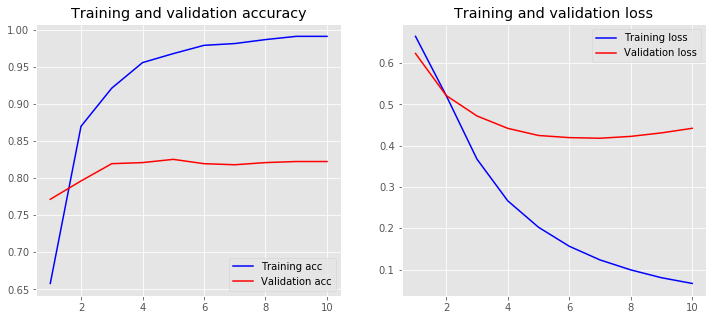

In [8]:
# visualize the training process
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [8]:
# use the model to predict on tweet data
tweets = tweet_data_df['text'].values
TX = vectorizer.transform(tweets)

res = model.predict(TX)
res.shape

(365669, 1)

In [9]:
tweet_data_df['cnn_sentiment'] = res

In [12]:
tweet_data_df.to_csv(r'C:\Users\willm\Documents\RStudioProjects\tweetData.csv')
#tweet_data_df.shape